# Car Price Prediction

## Problem Statement

Problem Statement:

-   The goal of this project is to develop a predictive model that accurately estimates the resale price of a car based on various features that influence its market value. The dataset contains the following features:

    -   Car Brand: The manufacturer or brand of the car.
    -   Year: The manufacturing year of the car.
    -   Sold Price: The historical selling price of the car.
    -   Present Price: The current price of the car in the market.
    -   KMS Driven: The total kilometers driven by the car.
    -   Fuel Type: The type of fuel used by the car (e.g., petrol, diesel).
    -   Seller Type: The type of seller (e.g., individual, dealer).
    -   Transmission Type: The type of transmission (e.g., manual, automatic).
    -   Owners: The number of previous owners of the car.
    
The model will be trained on this data to predict the car's resale price, taking into account these factors to provide an accurate valuation. This will assist potential buyers and sellers in making informed decisions in the used car market.

## Data Preprocessing

### Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Importing dataset and processing

#### Loading Dataset

In [4]:
car_info_dataset = pd.read_csv("../datasets/car data.csv")

#### Shape of the dataset

In [5]:
car_info_dataset.shape

(301, 9)

#### Viewing the first five rows of the dataset

In [11]:
car_info_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Checking for null values

In [12]:
car_info_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Checking number of missing values

In [15]:
car_info_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Checking categories' distribution

In [25]:
for column_name in car_info_dataset.columns:
    if column_name=="Fuel_Type" or column_name=="Seller_Type" or column_name=="Transmission":
        print(f"Different types of values in {column_name} column is:\n{car_info_dataset[column_name].value_counts()}\n")


Different types of values in Fuel_Type column is:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Different types of values in Seller_Type column is:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Different types of values in Transmission column is:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64



#### Encoding categorical data to numerical data

In [6]:
car_info_dataset.replace({"Fuel_Type":
                          {"Petrol":0, 
                           "Diesel":1,
                           "CNG":2}},
                           inplace=True)

car_info_dataset.replace({"Seller_Type":
                          {"Dealer":0, 
                           "Individual":1}},
                           inplace=True)

car_info_dataset.replace({"Transmission":
                          {"Manual":0, 
                           "Automatic":1}},
                           inplace=True)


/var/folders/4_/6zw1612x15v9r5b_2pnxpj8w0000gp/T/ipykernel_2981/2072891555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_info_dataset.replace({"Fuel_Type":
/var/folders/4_/6zw1612x15v9r5b_2pnxpj8w0000gp/T/ipykernel_2981/2072891555.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_info_dataset.replace({"Seller_Type":
/var/folders/4_/6zw1612x15v9r5b_2pnxpj8w0000gp/T/ipykernel_2981/2072891555.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

##### Checking after replacing values

In [27]:
car_info_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Train Test Split

#### Splitting X and Y from the dataset

In [7]:
X = car_info_dataset.drop(["Car_Name","Selling_Price"],axis=1)
Y = car_info_dataset["Selling_Price"]

#### Splitting train and test dataset

In [9]:
X_train , X_test , Y_train, Y_test = train_test_split(X,
                                                      Y,
                                                      test_size=0.1,
                                                      random_state=2)

## Model Building

### Linear Regression

In [30]:
linear_regression_model = LinearRegression()

#### Training the model

In [32]:
!pip install joblib

In [34]:
import joblib

# Train the model
linear_regression_model.fit(X_train, Y_train)

# Save the model to a file
joblib.dump(linear_regression_model, '../models/linear_regression_model.pkl')

# Load the model from the file
linear_regression_model = joblib.load('../models/linear_regression_model.pkl')



#### Model Evaluation

##### For training data

In [35]:
train_data_prediction = linear_regression_model.predict(X_train)

##### Using R square error

In [41]:
r_square_error_value_linear_train = metrics.r2_score(Y_train, train_data_prediction)
print(f"R square error value for linear regression model is {r_square_error_value_linear_train}")

R square error value for linear regression model is 0.8799451660493711


##### Visualising Actual price vs Predicted price

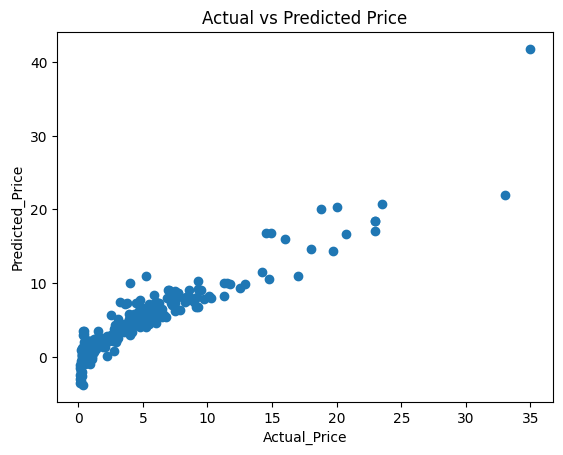

In [37]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual vs Predicted Price")
plt.show()

##### For test data

In [39]:
test_data_prediction = linear_regression_model.predict(X_test)

##### Using R squared error

In [42]:
r_square_error_value_linear_test = metrics.r2_score(Y_test, test_data_prediction)
print(f"R square error value for linear regression model is {r_square_error_value_linear_test}")

R square error value for linear regression model is 0.8365766715025366


##### Visualizing 

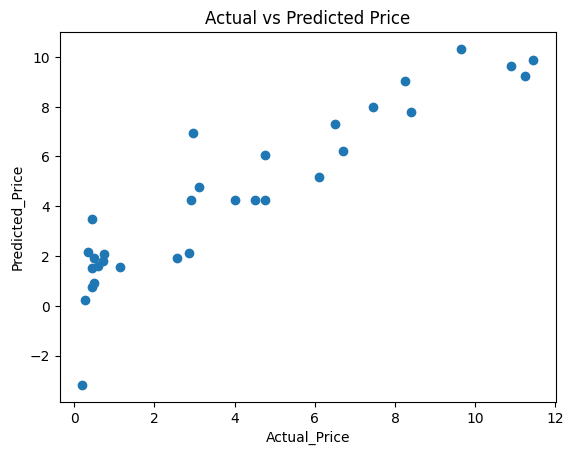

In [43]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual vs Predicted Price")
plt.show()

### Lasso Regression

In [44]:
### Lasso Regression
lasso_regression_model = Lasso()
#### Training the model
# Train the model
lasso_regression_model.fit(X_train, Y_train)

# Save the model to a file
joblib.dump(lasso_regression_model, '../models/lasso_regression_model.pkl')

# Load the model from the file
lasso_regression_model = joblib.load('../models/lasso_regression_model.pkl')


R square error value for lasso regression model train data is 0.8427856123435794


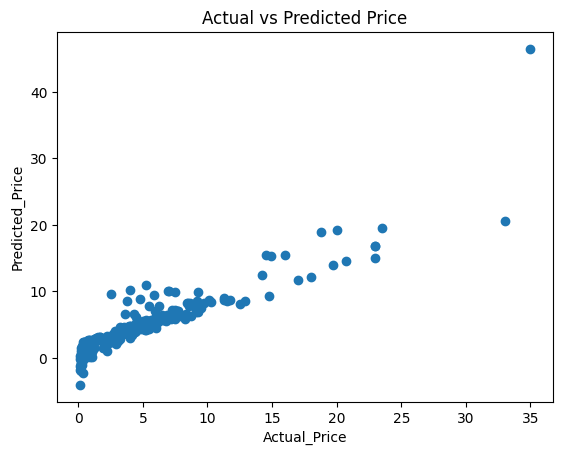

In [45]:
#### Model Evaluation
##### For training data
lasso_train_data_prediction = lasso_regression_model.predict(X_train)
##### Using R square error
r_square_error_value_lasso_train = metrics.r2_score(Y_train, lasso_train_data_prediction)
print(f"R square error value for lasso regression model train data is {r_square_error_value_lasso_train}")
##### Visualising Actual price vs Predicted price
plt.scatter(Y_train,lasso_train_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual vs Predicted Price")
plt.show()

R square error value for lasso regression model test data is 0.8709167941173195


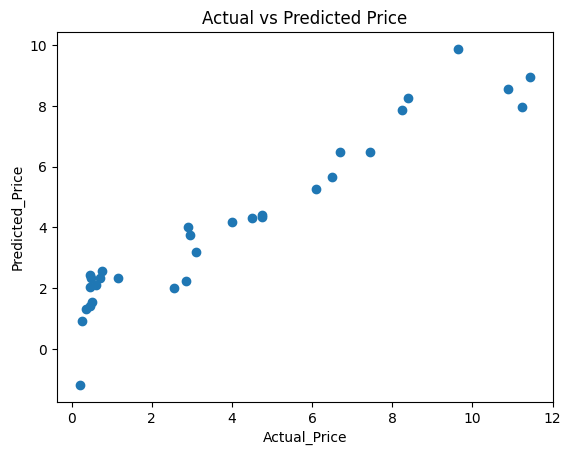

In [46]:
##### For test data
lasso_test_data_prediction = lasso_regression_model.predict(X_test)
##### Using R squared error
r_square_error_value_lasso_test = metrics.r2_score(Y_test, lasso_test_data_prediction)
print(f"R square error value for lasso regression model test data is {r_square_error_value_lasso_test}")
##### Visualizing 
plt.scatter(Y_test,lasso_test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual vs Predicted Price")
plt.show()